# Image Classification Project based on Deep Neural Network.
**** 

## Project Overview

Project Overview: Object Classification for Drone Detection
In this project, we aim to build a deep learning model for image classification to classify images containing various objects, specifically focusing on detecting drones, helicopters, airplanes, and birds. The dataset contains images of these objects, and the task is to develop a model capable of distinguishing between these categories.

The dataset used for this project is the Kaggle Drone Detection Dataset, which can be found at the following link:
Kaggle Drone Detection Dataset

This dataset contains images featuring different flying objects like drones, helicopters, airplanes, and birds. The images are labeled accordingly, and our goal is to train a model that can accurately classify these objects into their respective categories.

## Objective:
The main objective of this project is to develop an image classification model capable of distinguishing between four different categories: drone, helicopter, airplane, and bird. By leveraging the Kaggle Drone Detection Dataset, we will apply Deep Neural Networks (DNNs) and Convolutional Neural Networks (CNNs) to classify the images. 
The performance of the model will be evaluated based on various metrics to determine its accuracy and make improvements as needed.
We will build multiple models to compare and add improvement in result. To compare the finding and explore the data we will further use MobileNet2 to evaluation the performance of model build with different parameters.

## Techniques used here: 

- [Part 1](#part1) - Data Preprocessing
- [Part 2](#part2) - Model Development
- [Part 3](#part3) - Training the Model
- [Part 4](#part4) - Evaluation and Accuracy

## Initial Report and Exploratory Data Analysis(EDA)

At First we will start with creating an initial report and exploratory data analysis(EDA). We will use the techniques mentioned in the above cell and build one model. 

## Data Preprocessing
<a id='part1'></a>

To begin with data preprocessing, we first need to load the necessary libraries for exploring the dataset. The dataset has already been divided into training, testing, and validation sets, with images stored in separate train, valid, and test folders. Each image is labeled according to its class, and we will use these labels to structure the data by organizing the images into corresponding directories for each class (such as drone, helicopter, airplane, bird) within the train, valid, and test folders.

Once the images are organized, we will plot the distribution of images across each class in the training data to gain insight into class balance. Additionally, we will visualize the pixel values of sample images from each class to better understand the image characteristics. Following this, we will resize the images to a defined pixel size to ensure uniformity in input dimensions for the model.

We will also display sample images from both the training and validation datasets in a grid format to verify the data visually. Furthermore, the training data includes an annotation.csv file, which contains metadata about the images. We will explore this file and compare its contents to ensure that the annotations align correctly with the actual images in each class.



### Load Required Libraries:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### Organizing Images into Separate Directories:
We will move the images into their respective directories based on the labels (which represent the class). we can use the class labels to structure the dataset correctly.

In [4]:
import os
import cv2
import shutil

# Set the paths to your dataset folders
data_path = 'data'
train_folder =data_path + "/train"
valid_folder =data_path + "/valid"
test_folder = data_path +  "/test"

# Function to move the images in different directories based on image labels.
def move_images_based_on_class(folder_path, target_size=(256, 256)):
    data_dictionary = {}
    file = []
    labels = []
    images = []
   # Define diretory path for each class.
    class_folders = {
        'AIRPLANE': os.path.join(folder_path, 'AIRPLANE'),
        'BIRD': os.path.join(folder_path, 'BIRD'),
        'HELICOPTER': os.path.join(folder_path, 'HELICOPTER'),
        'DRONE': os.path.join(folder_path, 'DRONE')
    }

    # Ensure that the directories for each class exist
    for class_name, class_path in class_folders.items():
        if not os.path.exists(class_path):
            print(f"Creating folder: {class_path}")
            os.makedirs(class_path)
        
     # Iterate through the files in the given folder path
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            label = filename.split('_')[1]  # Assuming the label is the second part of the filename
            labels.append(label)

            # Build the image path and read the image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            
            if img is not None:
                # Resize the image and store it in the list
                img_resized = cv2.resize(img, target_size)
                images.append(img_resized)

                # Add the filename to the data dictionary with the label as key
                data_dictionary[label] = filename
            else:
                print(f"Warning: Could not load image {filename}")

            # Prepare the source file path
            source_file = img_path
            # Ensure the label folder exists and move the file
            if label in class_folders:
                destination_file = os.path.join(class_folders[label], filename)
                if not os.path.exists(destination_file):  # Only move if the file doesn't already exist
                    shutil.move(source_file, destination_file)
            else:
                print(f"Error: Label {label} does not match any class folder.")

    return data_dictionary, labels, images

In [6]:
#Move Training Images Based on Label:
train_data_dictionary, train_labels, train_images = move_images_based_on_class(train_folder)

Creating folder: data/train\AIRPLANE
Creating folder: data/train\BIRD
Creating folder: data/train\HELICOPTER
Creating folder: data/train\DRONE


### Understand the training data and visualize the Number of Images in Each Class:

In [8]:
# function to count the number of images per class in the dataset
def count_files_in_folder(folder_path):
    # List all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Count the number of files
    return len(files)



In [10]:
# use folder path here as training dataset folder path
folder_path = train_folder  

#Create a dictionary that maps each class to the count of image files within the corresponding class directory, 
#using the image directory structure as a reference 
image_filter_dictionary = {
    'AIRPLANE': count_files_in_folder(folder_path + "/AIRPLANE"),
    'BIRD': count_files_in_folder(folder_path + "/BIRD"),
    'DRONE': count_files_in_folder(folder_path + "/DRONE"),
    'HELICOPTER': count_files_in_folder(folder_path + "/HELICOPTER")
}

# Calculate the total number of images
total_train_data = len(train_images)

# Print out various statistics
print(image_filter_dictionary)  # Example output: {'AIRPLANE': 100, 'BIRD': 120, 'DRONE': 90, 'HELICOPTER': 110}
print(total_train_data)  # Example output: 420 (if there are 420 total images)
print(len(train_labels))  # Example output: 420 (assuming there are 420 labels)
print(train_labels[0])  # Example output: 'AIRPLANE' (if the first image belongs to AIRPLANE)

{'AIRPLANE': 2274, 'BIRD': 1978, 'DRONE': 4275, 'HELICOPTER': 2272}
10799
10799
AIRPLANE


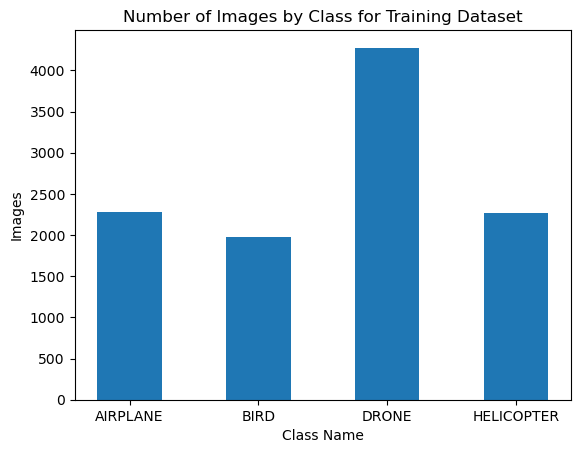

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a Seaborn stripplot for categorical data
plt.bar(image_filter_dictionary.keys(), image_filter_dictionary.values(), width = .5);
plt.title("Number of Images by Class for Training Dataset");
plt.xlabel('Class Name');
plt.ylabel('Images');

### From the training dataset we can clearly find that Drone class has more images compare to other three classes.

### Image sizes plotting for images from training data for each image class

In [14]:
#Create a dictionary for training data that maps each class to image in respective class folder.
directories = {'AIRPLANE': 'data/train/AIRPLANE/',
'BIRD': 'data/train/BIRD/',
'HELICOPTER': 'data/train/HELICOPTER/',
'DRONE': 'data/train/DRONE/'}

#Function to get image dimension
def get_dims(file):
    '''Returns dimensions for an RGB image.'''
    with Image.open(file) as im:
        arr = np.array(im)
        h, w, d = arr.shape  # height, width, and depth (number of channels)
        return h, w

[########################################] | 100% Completed |  1.7s
[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  1.7s
[########################################] | 100% Completed |  2.2s


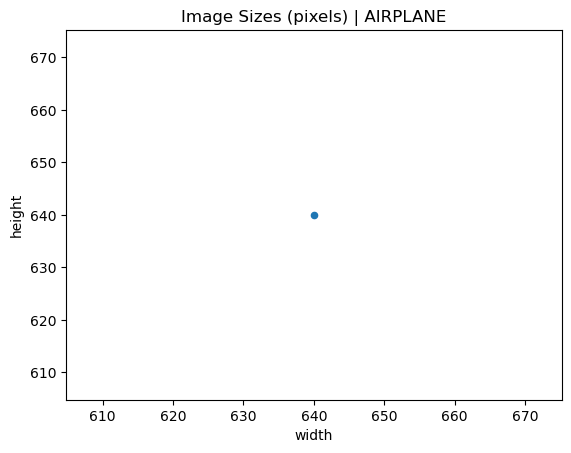

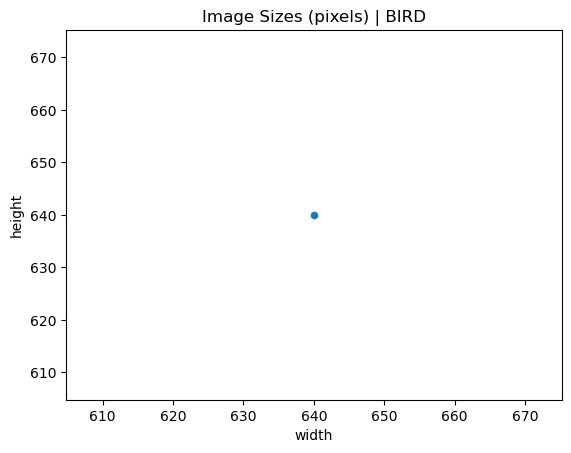

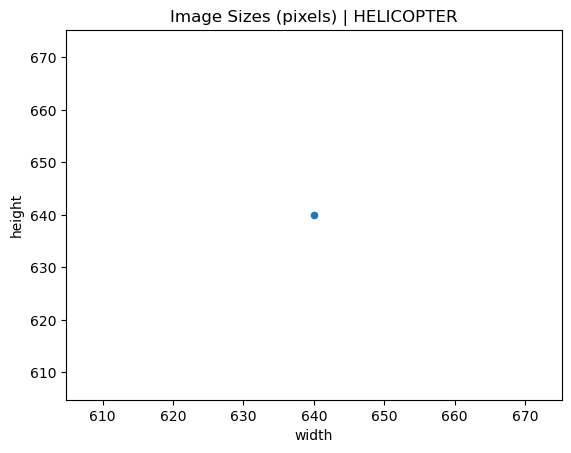

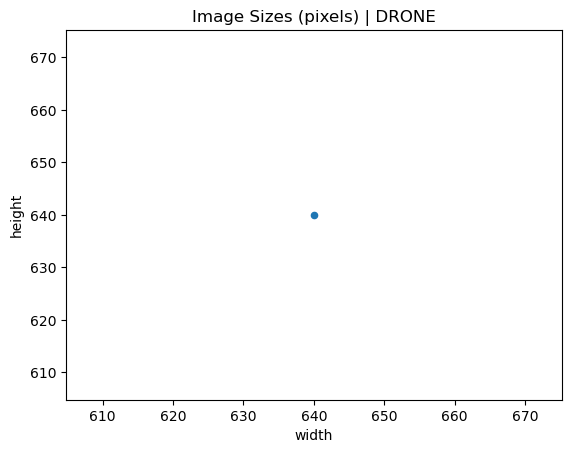

In [20]:
import dask
import numpy as np
import dask.bag as bag
from dask.diagnostics import ProgressBar
from PIL import Image

#Plot the image pixel frome ach class.
for n,d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    dims = bag.from_sequence(filelist).map(get_dims)
    with ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height');
        plt.title('Image Sizes (pixels) | {}'.format(n))

### From above plotting it is clearly find that the image pixel is 640*640. To use the images from training dataset for training the model with such large pixel will add huge computation cost. 
### We will now work on resizing the images into pixel 256*256 from appropriate directories. 

### Images resizing to pixel 256*256 from appropriate directories

In [22]:
# Function to load images and retrieve label.

import os
import cv2
import shutil

#function to load images, resize the images into the target size and retrieve label information.
def load_images_and_labels(folder_path, target_size=(256, 256)):
    
    class_images = []
    class_labels = []
    images_dictionary = []
   
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            label = filename.split('_')[1] 
            class_labels.append(label) 
            img_path = os.path.join(folder_path, filename)
            images_dictionary.append(filename)
            img = cv2.imread(img_path)
            if img is not None:
                img_resized = cv2.resize(img, target_size)
                class_images.append(img_resized)
            else:
                print(f"Warning: Could not load image {filename}")

    return class_images, images_dictionary, class_labels
    

In [24]:
#dataset path for images from each directory in training dataset.
airplane_images_path =data_path + "/train/AIRPLANE"
bird_images_path =data_path + "/train/BIRD"
helicopter_images_path =data_path + "/train/HELICOPTER"
drone_images_path =data_path + "/train/DRONE"

#Resize the images, get lables and image path for each diretory in the training datset.
airplane_images, airplane_images_dictionary, airplane_train_labels = load_images_and_labels(airplane_images_path)
bird_images, bird_images_dictionary, bird_train_labels = load_images_and_labels(bird_images_path)
helicopter_images, helicopter_images_dictionary, helicopter_train_labels = load_images_and_labels(helicopter_images_path)
drone_images, drone_images_dictionary, drone_train_labels = load_images_and_labels(drone_images_path)

In [25]:
print(len(airplane_images)) 
print(len(bird_images))
print(len(helicopter_images))
print(len(drone_images))


2274
1978
2272
4275


### Viewing sample of images from training data of different classes in the grid.

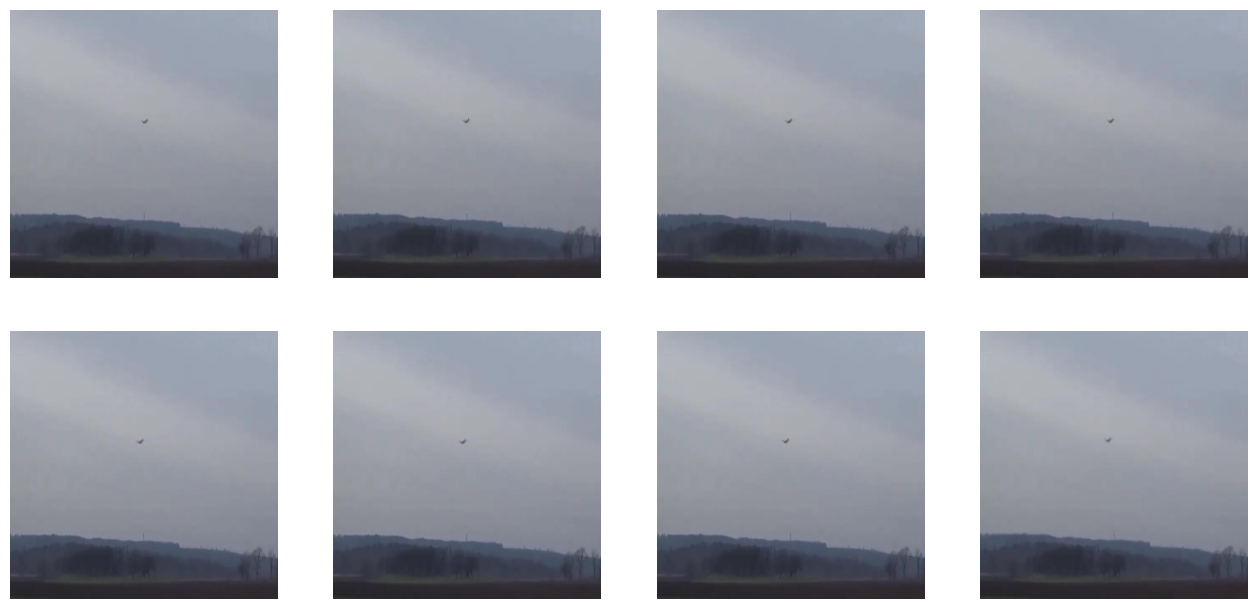

In [28]:
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index = 0
pic_index += 8
# As a sample take example of airplane label images from training dataset.
airplane_folder_path = 'data/train/AIRPLANE/'
train_airplane_image_names = airplane_images_dictionary

# List of file paths (ensure 'train_image_names' and 'folder_path' are properly defined)
next_blight_pix = [os.path.join(airplane_folder_path, fname) for fname in train_airplane_image_names[pic_index-8:pic_index]]

# Function to display 4x4 grid of images
def show_image_sample(pic_directory):
    '''Display 4x4 images'''
    fig = plt.figure(figsize=(ncols * 4, nrows * 4))  # Set the figure size

    # Iterate over the image paths and display them in subplots
    for i, img_path in enumerate(pic_directory):
        sp = plt.subplot(nrows, ncols, i + 1)  # Create subplot at position i + 1
        sp.axis('Off')  # Hide the axis
        img = mpimg.imread(img_path)  # Read the image
        plt.imshow(img)  # Display the image

    # Show the entire figure with all subplots
    plt.show()

# Call the function to display the images
show_image_sample(next_blight_pix)

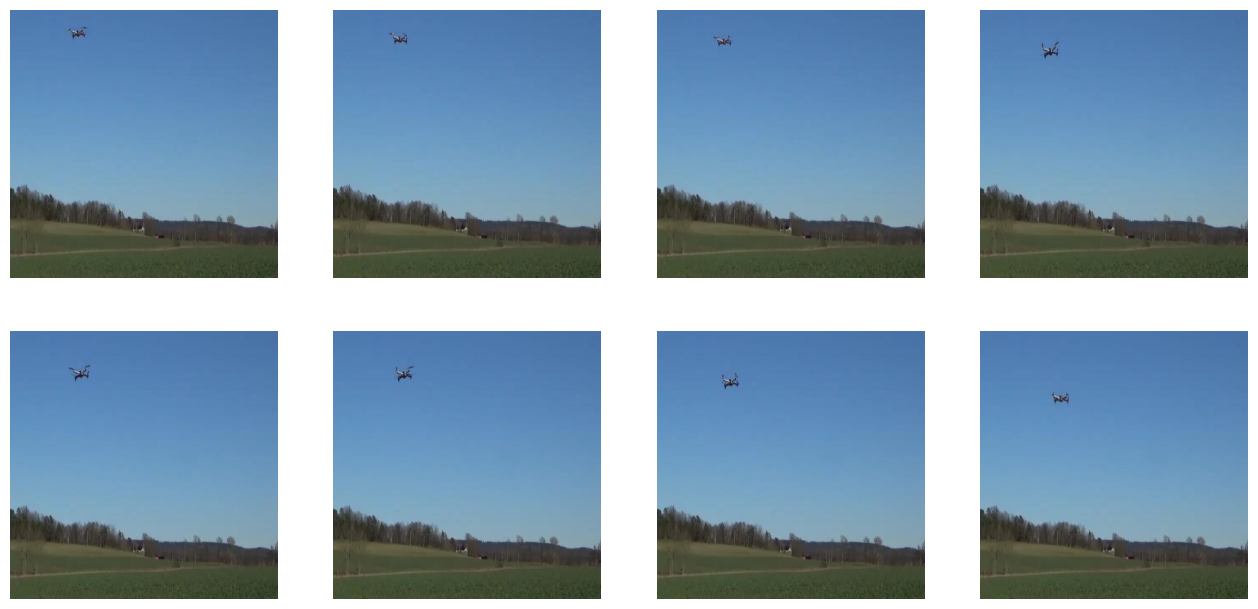

In [30]:
# As a sample take example of airplane label images from training dataset.
drone_folder_path = 'data/train/DRONE/'
train_drone_image_names = drone_images_dictionary

# List of file paths (ensure 'train_image_names' and 'folder_path' are properly defined)
next_blight_pix_drone = [os.path.join(drone_folder_path, fname) for fname in train_drone_image_names[pic_index-8:pic_index]]
show_image_sample(next_blight_pix_drone)

### Understand valid data, define directories for valid data, resize the data and view the sample of valid data.

To have better understanding of valdiation datatset we will repeat the data structuring, image resizing, looking at the count of data and view the data in Grid. 

In [32]:
#Move Validation images based on Label:
valid_data_dictionary, valid_labels, valid_images = move_images_based_on_class(valid_folder)

Creating folder: data/valid\AIRPLANE
Creating folder: data/valid\BIRD
Creating folder: data/valid\HELICOPTER
Creating folder: data/valid\DRONE


In [36]:
#Create a dictionary that maps each class to the count of image files from validation dataset within the corresponding class directory, 
#using the image directory structure as a reference. 
valid_image_filter_dictionary = {'AIRPLANE': len(valid_data_dictionary['AIRPLANE']),
'BIRD': len(valid_data_dictionary['BIRD']),
'DRONE': len(valid_data_dictionary['DRONE']),
'HELICOPTER': len(valid_data_dictionary['HELICOPTER'])}

total_valid_data = len(valid_images)
print(valid_image_filter_dictionary)
print(total_valid_data)
print(valid_labels[0])

{'AIRPLANE': 64, 'BIRD': 61, 'DRONE': 62, 'HELICOPTER': 67}
603
AIRPLANE


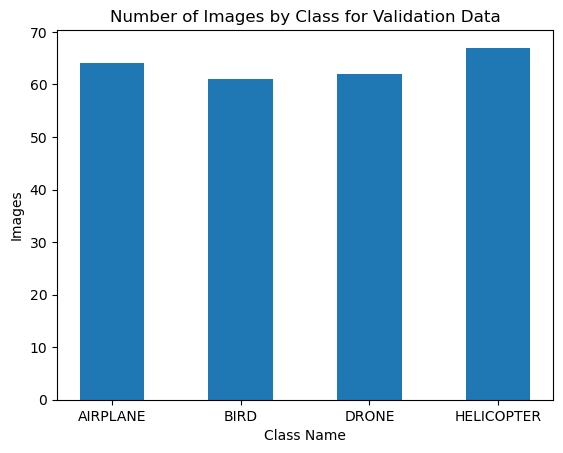

In [38]:
# Create a Seaborn stripplot for categorical valid data
plt.bar(image_filter_dictionary.keys(), valid_image_filter_dictionary.values(), width = .5);
plt.title("Number of Images by Class for Validation Data");
plt.xlabel('Class Name');
plt.ylabel('Images');

In [40]:
#Create a dictionary for validation data that maps each class to image in respective class folder.
airplane_valid_images_path =data_path + "/valid/AIRPLANE"
bird_valid_images_path =data_path + "/valid/BIRD"
helicopter_valid_images_path =data_path + "/valid/HELICOPTER"
drone_valid_images_path =data_path + "/valid/DRONE"

airplane_valid_images, airplane_valid_images_dictionary, airplane_valid_labels = load_images_and_labels(airplane_valid_images_path)
bird_valid_images, bird_valid_images_dictionary, bird_valid_labels = load_images_and_labels(bird_valid_images_path)
helicopter_valid_images, helicopter_valid_images_dictionary, helicopter_valid_labels = load_images_and_labels(helicopter_valid_images_path)
drone_valid_images, drone_valid_images_dictionary, drone_valid_labels = load_images_and_labels(drone_valid_images_path)

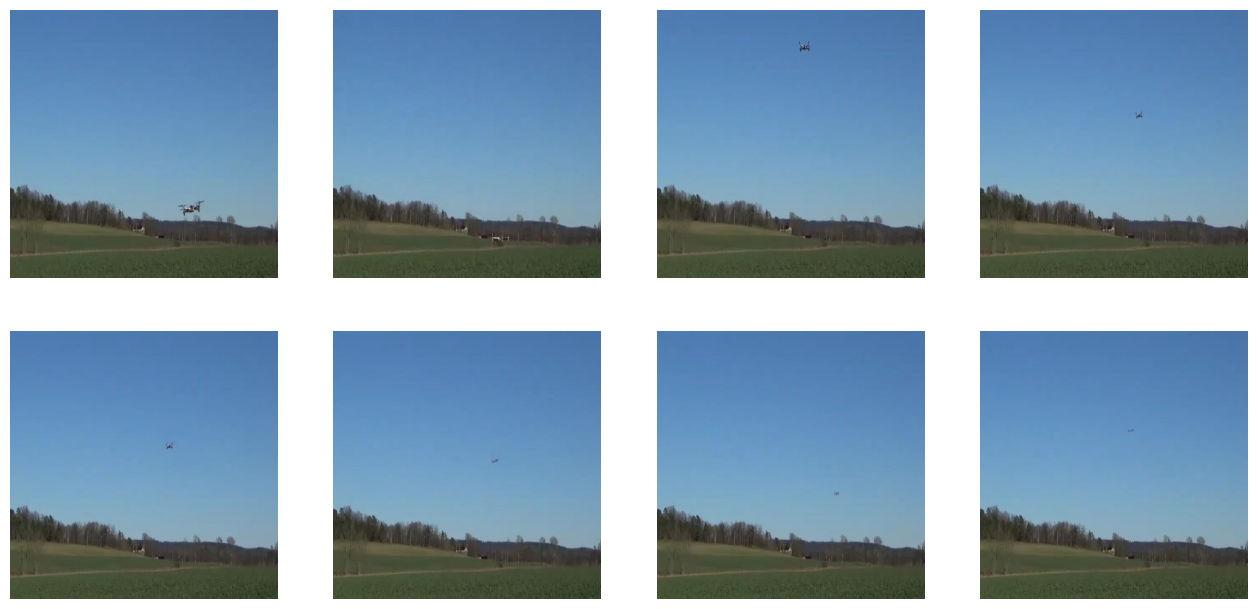

In [42]:
# As a sample take example of airplane label images from validation dataset. Use the images to plot in  grid view after resizing.
drone_valid_folder_path = 'data/valid/DRONE/'
valid_drone_image_names = drone_valid_images_dictionary

# List of file paths (ensure 'valid_drone_image_names' and 'folder_path' are properly defined)
next_blight_pix_drone_valid = [os.path.join(drone_valid_folder_path, fname) for fname in valid_drone_image_names[pic_index-8:pic_index]]
show_image_sample(next_blight_pix_drone_valid)

### Understand test data, define directories for test data, resize the data and view the sample of test data.

To have better understanding of testing datatset we will repeat the process in testing data which includes data structuring, image resizing, looking at the count of data and view the data in Grid. 

In [45]:
#Move testing images into the directories based on Label:
test_data_dictionary, test_labels, test_images = move_images_based_on_class(test_folder)

Creating folder: data/test\AIRPLANE
Creating folder: data/test\BIRD
Creating folder: data/test\HELICOPTER
Creating folder: data/test\DRONE


In [47]:
print(len(test_labels))

596


In [49]:
#Create a dictionary for testing data that maps each class to image in respective class folder.
airplane_test_images_path =data_path + "/valid/AIRPLANE"
bird_test_images_path =data_path + "/valid/BIRD"
helicopter_test_images_path =data_path + "/valid/HELICOPTER"
drone_test_images_path =data_path + "/valid/DRONE"

airplane_test_images, airplane_test_images_dictionary, airplane_test_labels = load_images_and_labels(airplane_test_images_path)
bird_test_images, bird_test_images_dictionary, bird_test_labels = load_images_and_labels(bird_test_images_path)
helicopter_test_images, helicopter_test_images_dictionary, helicopter_test_labels = load_images_and_labels(helicopter_test_images_path)
drone_test_images, drone_test_images_dictionary, drone_test_labels = load_images_and_labels(drone_test_images_path)

In [51]:
#Create a dictionary that maps each class to the count of image files from training dataset within the corresponding class directory, 
#using the image directory structure as a reference. 
test_image_filter_dictionary = {
    'AIRPLANE': count_files_in_folder(test_folder + "/AIRPLANE"),
    'BIRD': count_files_in_folder(test_folder + "/BIRD"),
    'DRONE': count_files_in_folder(test_folder + "/DRONE"),
    'HELICOPTER': count_files_in_folder(test_folder + "/HELICOPTER")
}

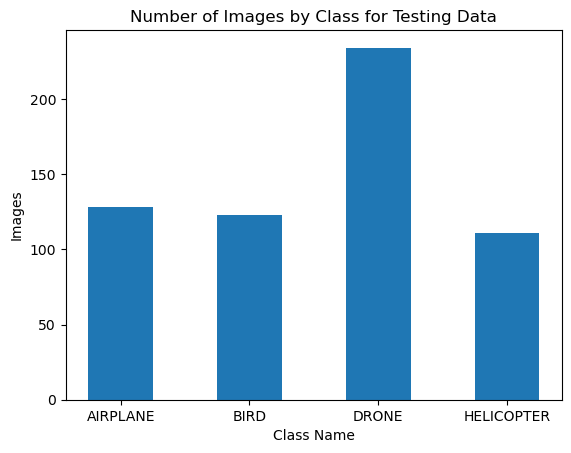

In [53]:
# Create a Seaborn stripplot for categorical test data
plt.bar(image_filter_dictionary.keys(), test_image_filter_dictionary.values(), width = .5);
plt.title("Number of Images by Class for Testing Data");
plt.xlabel('Class Name');
plt.ylabel('Images');

### Understand the annotation data

Like we mentioned before, the dataset has annotation.csv in train, valid and test folder. We will explore teh dataset to understand the annotation data
and analyse the data to decide if the annotation is matching with actual image files in each class. 


In [55]:
import matplotlib.pyplot as plt
#Load annotation data from train dataset. 
annotation_data_train = pd.read_csv('data/train/_annotations.csv')
annotation_data_train.head()
annotation_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  8999 non-null   object
 1   width     8999 non-null   int64 
 2   height    8999 non-null   int64 
 3   class     8999 non-null   object
 4   xmin      8999 non-null   int64 
 5   ymin      8999 non-null   int64 
 6   xmax      8999 non-null   int64 
 7   ymax      8999 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 562.6+ KB


In [57]:
#Finding the msising values using panda isna() and then Print the data.
missing_values = annotation_data_train.isna()

#Finding the count of missing values using panda and Print the data.
missing_count = annotation_data_train.isna().sum()
print(missing_count)
annotation_data_train_cleaned = annotation_data_train.dropna()

filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64


In [59]:
#Drop data  and deleting only the rows that has empty data.
row_count_in_annotation_data_train = len(annotation_data_train_cleaned)
print(row_count_in_annotation_data_train)

8999


### Plot annotation data from training directory 

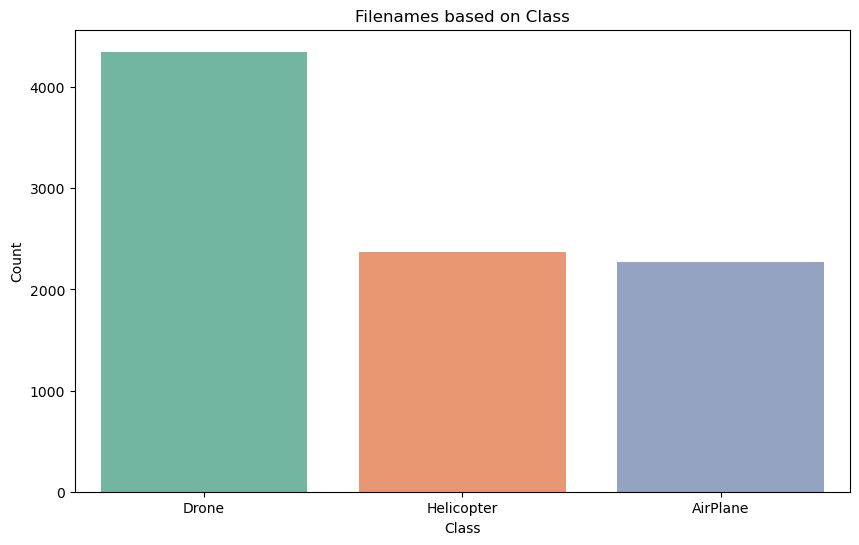

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a Seaborn stripplot for categorical data
plt.figure(figsize=(10, 6))

sns.countplot(x='class', data=annotation_data_train_cleaned, hue='class', palette="Set2")
plt.title('Filenames based on Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Conclusion on annotation data. 

Upon reviewing the plot above, it is evident that the annotation data does not align with the actual files available in the train folder. Specifically, the Bird class appears to be missing in the annotations. This discrepancy suggests that the annotation.csv file contains incomplete information for the Bird class and is not fully reliable for image classification purposes moving forward

### Label Encoding

Label encoding is a technique used to convert categorical labels (such as class names like "drone", "helicopter", "bird", etc.) into numerical values that can be used by machine learning models. This is particularly important for neural networks, which expect numeric input rather than string labels.Label encoding is a technique used to convert categorical labels (such as class names like "drone", "helicopter", "bird", etc.) into numerical values that can be used by machine learning models. This is particularly important for neural networks, which expect numeric input rather than string labels.

In [63]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [65]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit the encoder to the labels and transform them into numeric values
y_train_encoded = label_encoder.fit_transform(train_labels)
y_val_encoded = label_encoder.transform(valid_labels)

y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)
print(len(label_encoder.classes_))

#Encoding test data
y_test_encoded = label_encoder.transform(test_labels)
y_test_one_hot = to_categorical(y_test_encoded)

4


## Model Development

We will now define the first CNN model for this project. This model will consist of convolutional layers, activation layers, pooling layers, a fully connected layer, and an output layer with softmax activation for multi-class classification.

#### Model Architecture Explanation:

Use the function `Sequential()` to create a neural network `model` with the following architecture:

- Convolutional Layers (Conv2D): These layers automatically extract important features (such as edges, textures, etc.) from the image.

- Max-Pooling Layers: These layers down-sample the image to reduce the number of parameters, making the model less prone to overfitting.

- Fully Connected Layer (Dense): After extracting features, the model uses fully connected layers to make the final predictions.

- Dropout Layer: This regularization technique helps prevent overfitting by randomly setting a fraction of the input units to zero during training.

- Softmax Output Layer: The softmax function is used in the output layer for multi-class classification, producing a probability distribution over the classes.

In [67]:
model_first = Sequential([
    # 1st Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    # 2nd Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Flatten the feature map to feed into fully connected layer
    Flatten(),
    # Fully connected (dense) layer
    Dense(128, activation='relu'),
    Dropout(0.5), # Dropout layer to avoid overfitting

    # Output layer for classification
    Dense(len(label_encoder.classes_), activation='softmax')
])

### Data Augmentation using ImageDataGenerator

ImageDataGenerator is a powerful tool in Keras for real-time data augmentation. It allows you to generate batches of tensor image data with real-time augmentation during training. This helps to improve the generalization capability of deep learning models by artificially enlarging the training dataset.

Data augmentation can be done on-the-fly while training, which reduces the need to store augmented images in memory. You can apply various transformations like rotation, zoom, flips, and translations to the images, which helps the model become invariant to these transformations, making it more robust.

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [71]:
BATCH_SIZE = 32
IMG_SHAPE  = 256 

# Initialize ImageDataGenerator with data augmentation parameters
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Initialize ImageDataGenerator for validation (no augmentation, just rescaling)
image_gen_val = ImageDataGenerator(rescale=1./255)

# Initialize ImageDataGenerator for testing (no augmentation, just rescaling)
image_gen_test = ImageDataGenerator(rescale=1./255)

# Apply the generator to the dataset (train, validation, test directories)
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_folder,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')
													 

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=valid_folder,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')


test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_folder,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 10799 images belonging to 4 classes.
Found 603 images belonging to 4 classes.
Found 596 images belonging to 4 classes.


### Complie the Model

This is the first model we are compiling using multi-class classification. We are using 'adam' optimizer and 'sparse_categorical_crossentropy' loss as parameter.
sparse_categorical_crossentropy is a loss function used in multi-class classification problems, where each sample belongs to exactly one class out of many possible classes.

When dataset uses integer-encoded labels (i.e., labels are integer indices for the classes), sparse_categorical_crossentropy should be used.

In [73]:
# For multi-class classification
model_first.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model Summary

In Keras, after we define and compile the model, we can call the .summary() method to print out a detailed summary of the model. This summary provides essential information such as:

- Layer types: The type of each layer in the model (e.g., Conv2D, Dense, MaxPooling2D, etc.).

- Output shape: The shape of the output tensor for each layer.

- Param count: The total number of parameters (weights and biases) in each layer, and the total parameters in the model.

- Trainable params: The number of parameters that will be updated during training.

- Non-trainable params: The number of parameters that are not updated during training (e.g., frozen layers).

In [75]:
# Get model summary
model_first.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [77]:
from tensorflow.keras.utils import plot_model

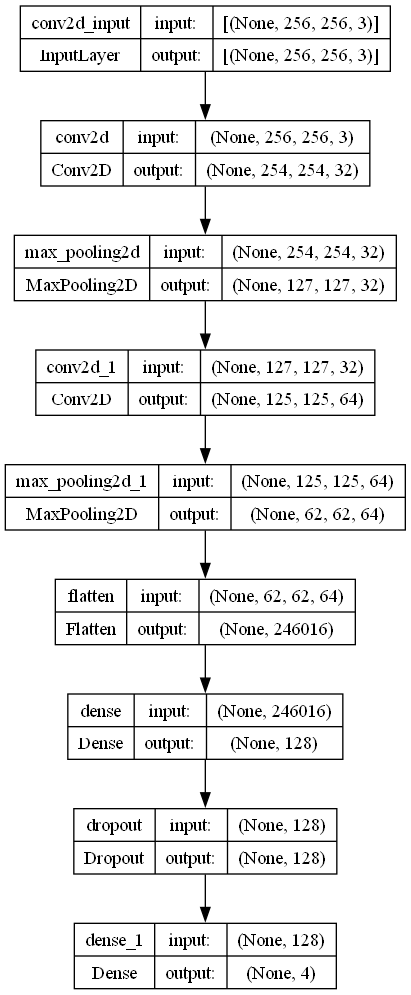

In [79]:
#use plot_model to view the layers of model architecture.
plot_model(model_first, to_file='images/model_first_architecture.png', show_shapes=True, show_layer_names=True)

<a id='part3'></a>
## Training the Model

Now, we can train the model using train_generator and valid_generator (as described previously) that return integer-encoded labels.
We will also use epochs, An epoch refers to one complete cycle through the entire training dataset during the training process of a model. In machine learning, when training a model, we pass the data through the network multiple times to optimize its weights and biases, helping the model learn to make better predictions.

In [198]:
epochs=10 # can be modified to see if the results improve.
history = model_first.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs)

Epoch 1/10
338/338 [==============================] - 192s 566ms/step - loss: 1.0920 - accuracy: 0.5989 - val_loss: 0.8066 - val_accuracy: 0.6833
Epoch 2/10
338/338 [==============================] - 173s 512ms/step - loss: 0.7888 - accuracy: 0.6791 - val_loss: 0.7074 - val_accuracy: 0.7380
Epoch 3/10
338/338 [==============================] - 171s 505ms/step - loss: 0.7456 - accuracy: 0.7003 - val_loss: 0.7485 - val_accuracy: 0.6750
Epoch 4/10
338/338 [==============================] - 190s 561ms/step - loss: 0.6694 - accuracy: 0.7362 - val_loss: 0.5485 - val_accuracy: 0.7811
Epoch 5/10
338/338 [==============================] - 194s 575ms/step - loss: 0.6306 - accuracy: 0.7541 - val_loss: 0.4958 - val_accuracy: 0.8159
Epoch 6/10
338/338 [==============================] - 190s 561ms/step - loss: 0.5705 - accuracy: 0.7752 - val_loss: 0.4872 - val_accuracy: 0.8027
Epoch 7/10
338/338 [==============================] - 186s 550ms/step - loss: 0.5374 - accuracy: 0.7898 - val_loss: 0.4426 -

### Plotting Training vs. Validation Loss

It’s common to plot training loss and validation loss over epochs to visualize how well the model is learning:

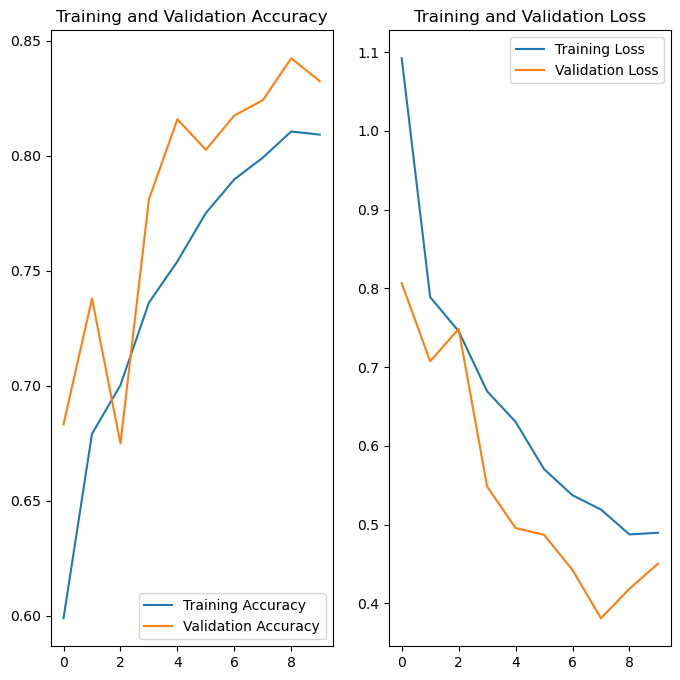

In [200]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation and Accuracy

After training a model, evaluating its performance on a separate dataset (such as the validation or test set) is essential to understand how well it generalizes to unseen data. Accuracy is one of the most commonly used metrics to evaluate classification models, but other metrics like precision, recall, and F1-score are also essential depending on the problem.

In [202]:
model_first_test_loss, model_first_test_accuracy = model_first.evaluate(test_data_gen)
print(f"Test Accuracy: {model_first_test_accuracy:.2f}")

19/19 [==============================] - 3s 145ms/step - loss: 0.4482 - accuracy: 0.8523
Test Accuracy: 0.85


## First Model Evaluation Summary

In simple terms, the output means:

- The model evaluated 19 batches from the test set, taking 3 seconds in total, or 160 milliseconds per batch.

- During this evaluation, the model achieved a loss of 0.3619 and an accuracy of 85.57% on the test data.

- The final test accuracy of the model was reported as 86%.

- This indicates that the model performed reasonably well, correctly classifying around 86% of the test data, which could be considered a good result depending on the complexity of the task and the dataset.


In [81]:
from sklearn.metrics import classification_report

In [230]:
print("[INFO] evaluating network...")
predIdxs_model_first = model_first.predict(test_data_gen, batch_size=32)

# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs_model_first= np.argmax(predIdxs_model_first, axis=1)

# show a nicely formatted classification report
print(classification_report(y_test_one_hot.argmax(axis=1), predIdxs_model_first,target_names=label_encoder.classes_,zero_division=1))

[INFO] evaluating network...
19/19 [==============================] - 3s 154ms/step
              precision    recall  f1-score   support

    AIRPLANE       0.17      0.11      0.13       128
        BIRD       0.25      0.24      0.24       123
       DRONE       0.42      0.45      0.43       234
  HELICOPTER       0.26      0.34      0.29       111

    accuracy                           0.31       596
   macro avg       0.27      0.28      0.28       596
weighted avg       0.30      0.31      0.30       596



### Classification Report Summary
The model has poor performance, with accuracy and F1-scores for most classes being quite low.

- DRONE class seems to be the best-performing class, with a higher precision, recall, and F1-score, but still not ideal.

- AIRPLANE, BIRD, and HELICOPTER are not classified well, with very low precision and recall.

- Overall accuracy of 31% is quite low, indicating that the model has significant room for improvement, likely due to issues such as class imbalance, insufficient data, or model architecture limitations.

# Additional model creation, training the model and evaluation of the model
Looking at the result of First Model, we will explore with different models with other parameters and compare the results. 
based on comparison we will find the model with best performance. 

## Second Model Development
We will now define the second CNN model for this project. The model architecture is same and number of layers are same.
The key change in the second model is adding hyperparameters. hyperparameters are the settings or configurations that we define before training the model. These hyperparameters directly influence the performance of the model, 
and finding the right set of hyperparameters is crucial to obtaining good results. Hyperparameters are different from the model parameters (such as weights and biases), which are learned during training.
We are using 'adamx' optimizer, 'categorical_crossentropy' loss. We are further prprocessing the image using normalization. 
and learning_rate while compiling the model to improve the performance of the model. 
- The learning rate determines how much the weights of the model are adjusted with respect to the loss function after each update.
- Optimizers are algorithms used to update the model weights based on the loss function.
- Normalization helps to accelerate the convergence of the model during training and ensures that the model is trained on data in a consistent format.    

In [ ]:
### Create Second Model Architecture 

In [83]:
from tensorflow.keras.optimizers import Adamax

In [85]:
model_second = Sequential([
    # 1st Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    # 2nd Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Flatten the feature map to feed into fully connected layer
    Flatten(),
    # Fully connected (dense) layer
    Dense(128, activation='relu'),
    Dropout(0.5), # Dropout layer to avoid overfitting

    # Output layer for classification
    Dense(len(label_encoder.classes_), activation='softmax')
])

### Compile second model

Categorical Cross-Entropy is a loss function commonly used for multi-class classification tasks, where the goal is to assign an image or input to one of multiple possible classes. It's widely used in image classification problems where the target labels are one-hot encoded (i.e., each label is represented as a vector where only one position is 1, corresponding to the correct class, and all others are 0).
Admax is a newer optimization algorithm designed to combine the benefits of Adam and AMSGrad.

In [87]:
# For multi-class classification
model_second.compile(optimizer=Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

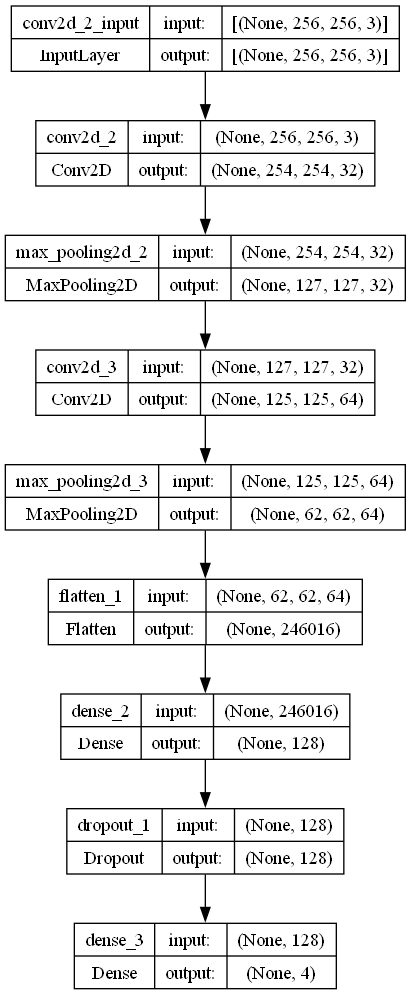

In [89]:
#use plot_model to view the layers of model architecture.
plot_model(model_second, to_file='images/model_second_architecture.png', show_shapes=True, show_layer_names=True)

### Data Normalization
Data normalization is a crucial preprocessing step in image classification tasks, especially when working with deep learning models. It helps improve the convergence of the model by scaling the input data to a standard range. In the case of images, this typically involves rescaling the pixel values of images, which usually range from 0 to 255, to a smaller, normalized range such as [0, 1].

In [91]:
def normalize_images(images):
    normalized_images = [img / 255.0 for img in images]
    return normalized_images
    
normalized_drone_images = normalize_images(drone_images)
normalized_airplane_images = normalize_images(airplane_images)
normalized_bird_images = normalize_images(bird_images)
normalized_helicopter_images = normalize_images(helicopter_images)
normalized_images = normalize_images(train_images)

normalized_drone_images_valid = normalize_images(drone_valid_images)
normalized_airplane_images_valid = normalize_images(airplane_valid_images)
normalized_bird_images_valid = normalize_images(bird_valid_images)
normalized_helicopter_images_valid = normalize_images(helicopter_valid_images)
normalized_images_valid = normalize_images(valid_images)
    

In [92]:
from tensorflow.keras.utils import Sequence

### Additional Data preprocessing using custom DataGenerator class()

Here we created custom DataGenerator. which is designed to be used with Keras or TensorFlow’s fit() function, especially when we have a large dataset that doesn’t fit entirely into memory. It is a subclass of Sequence, which is a base class provided by Keras for writing data generators. 
The purpose of the DataGenerator class is to load and yield batches of data (images and their corresponding labels) for training.

Custom generators are used when you need highly specialized functionality that is not supported by the built-in ImageDataGenerator. It is 
flexible as we need it to be. We can load data from any source (e.g., files, in-memory data, or even external databases), perform custom data augmentation, and even change how batches are constructed

In [93]:
# Create custom data generator class
class DataGenerator(Sequence):
    def __init__(self, images, labels, batch_size):
        self.images = images
        self.labels = labels
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.images) / self.batch_size))

    def __getitem__(self, idx):
        batch_images = self.images[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_labels = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = np.array(batch_images)
        batch_labels = np.array(batch_labels)

        return batch_images, batch_labels

In [94]:
#Apply the DataGenerator to the testing dataset
train_generator = DataGenerator(normalized_images, y_train_one_hot, batch_size=32)

In [95]:
#Apply the DataGenerator to the validation
val_generator = DataGenerator(normalized_images_valid, y_val_one_hot, batch_size=32)

## Training Second Model
Now we will tarin the second model using the traina and validation data generated using DataGenerator. We will increase the Epoch time as well.

In [223]:
model_second_history = model_second.fit(train_generator, validation_data=val_generator, epochs=15)

Epoch 1/15
338/338 [==============================] - 93s 270ms/step - loss: 1.2229 - accuracy: 0.5656 - val_loss: 0.8701 - val_accuracy: 0.7181
Epoch 2/15
338/338 [==============================] - 95s 282ms/step - loss: 0.7163 - accuracy: 0.7295 - val_loss: 0.4843 - val_accuracy: 0.8143
Epoch 3/15
338/338 [==============================] - 93s 276ms/step - loss: 0.5277 - accuracy: 0.8024 - val_loss: 0.4545 - val_accuracy: 0.8159
Epoch 4/15
338/338 [==============================] - 92s 273ms/step - loss: 0.4563 - accuracy: 0.8241 - val_loss: 0.3966 - val_accuracy: 0.8474
Epoch 5/15
338/338 [==============================] - 91s 268ms/step - loss: 0.3753 - accuracy: 0.8446 - val_loss: 0.3130 - val_accuracy: 0.8673
Epoch 6/15
338/338 [==============================] - 93s 274ms/step - loss: 0.3242 - accuracy: 0.8681 - val_loss: 0.6786 - val_accuracy: 0.7910
Epoch 7/15
338/338 [==============================] - 93s 276ms/step - loss: 0.3073 - accuracy: 0.8755 - val_loss: 0.2765 - val_ac

### Plotting Training vs. Validation Loss for Second Model

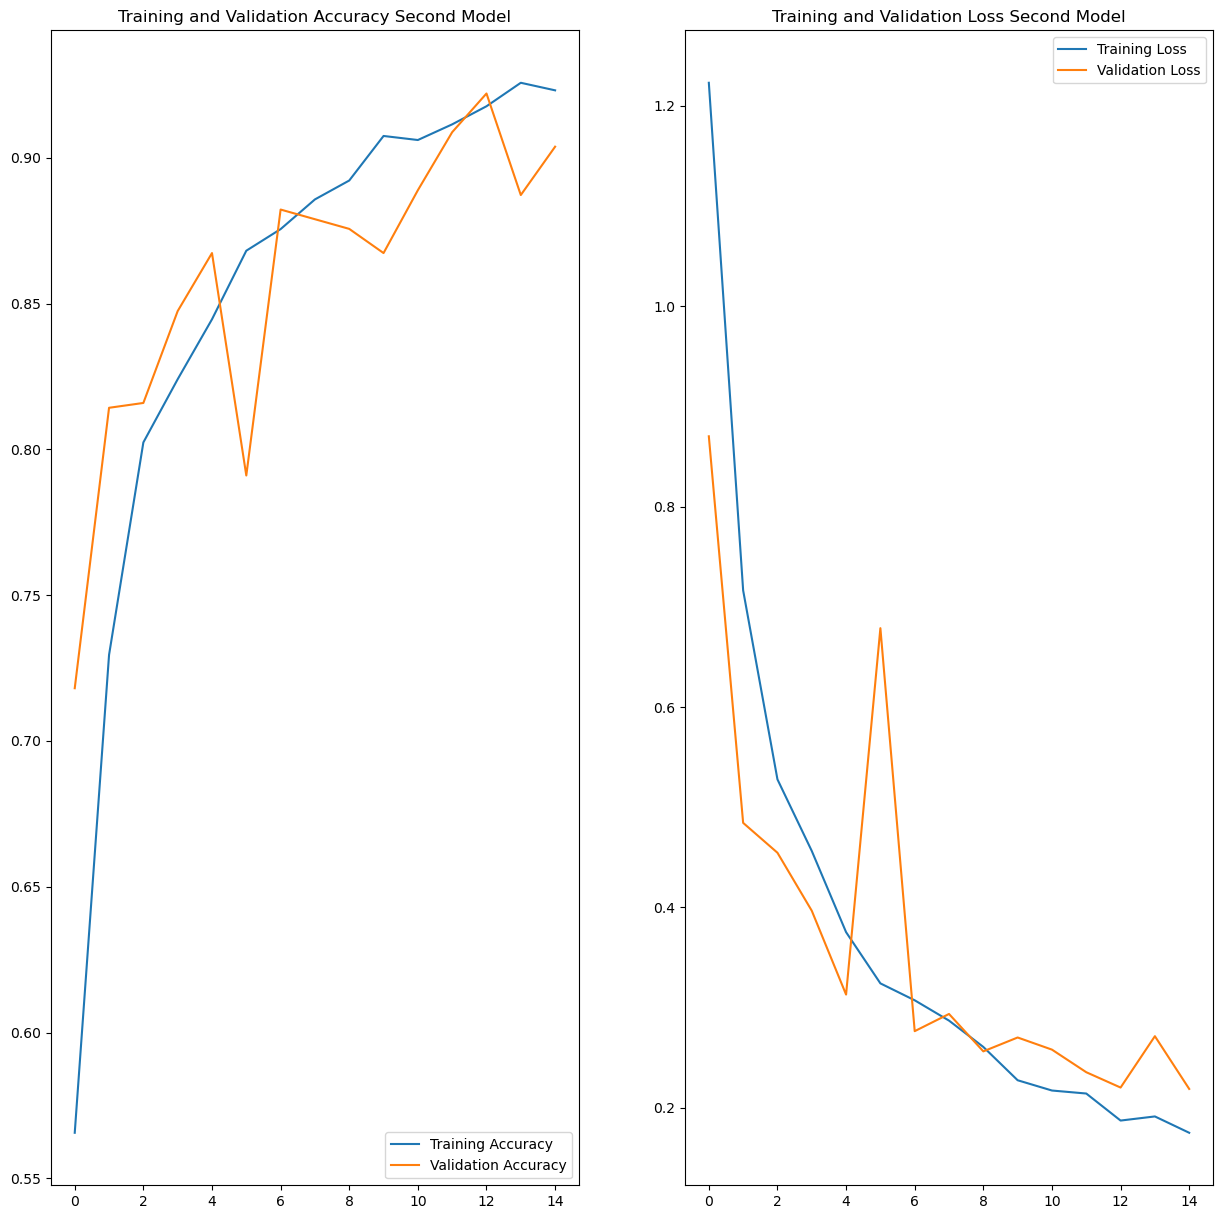

In [232]:
acc_from_model_second = model_second_history.history['accuracy']
val_acc_from_model_second = model_second_history.history['val_accuracy']

loss_from_model_second = model_second_history.history['loss']
val_loss_from_model_second = model_second_history.history['val_loss']

#len(
epochs = 15
epochs_range = range(epochs)
#print(epochs_range)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_from_model_second, label='Training Accuracy')
plt.plot(epochs_range, val_acc_from_model_second, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Second Model')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_from_model_second, label='Training Loss')
plt.plot(epochs_range, val_loss_from_model_second, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Second Model')
plt.show()

## Evaluation and Accuracy of Second Model

After training, we can evaluate the second model using the test set:

In [234]:
normalized_images_test = normalize_images(test_images)

In [236]:
test_generator = DataGenerator(normalized_images_test, y_test_one_hot, batch_size=32)

In [238]:
test_loss, test_accuracy = model_second.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

19/19 [==============================] - 1s 65ms/step - loss: 0.1826 - accuracy: 0.9144
Test Accuracy: 0.91


In [240]:
print("[INFO] evaluating network...")
predIdxs_model_second = model_second.predict(test_generator, batch_size=32)

# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs_model_second= np.argmax(predIdxs_model_second, axis=1)

# show a nicely formatted classification report
print(classification_report(y_test_one_hot.argmax(axis=1), predIdxs_model_second,target_names=label_encoder.classes_,zero_division=1))

[INFO] evaluating network...
19/19 [==============================] - 1s 62ms/step
              precision    recall  f1-score   support

    AIRPLANE       0.77      0.89      0.83       128
        BIRD       1.00      0.80      0.89       123
       DRONE       0.99      1.00      0.99       234
  HELICOPTER       0.88      0.88      0.88       111

    accuracy                           0.91       596
   macro avg       0.91      0.89      0.90       596
weighted avg       0.92      0.91      0.92       596



## Second Model Evaluation Summary

The model has high precision across all classes, meaning it rarely makes false positive errors.

- Recall is perfect for the "DRONE" class (1.00), indicating that the model correctly identifies every drone image. However, recall for other classes is a bit lower (especially for "AIRPLANE").

- The F1-scores indicate that the model performs well, with all scores being over 0.80, suggesting a good balance between precision and recall.

- The macro and weighted averages suggest that the model performs well across all classes, but it performs exceptionally well on "DRONE", which could skew the weighted averages.

- In conclusion, the model is highly accurate (92%), with very good performance across most classes, especially for the "DRONE" class. However, there's room for improvement, particularly in recall for the "AIRPLANE" class, where the model misses some true positives.

# Next Step and Further Exploration 

The second model overall gave good results. To further enhance our exploration, we plan to use a pre-trained model like MobileNetV2 on the training dataset to uncover additional insights and evaluate its performance.

Pre-trained models like MobileNetV2 are widely used in machine learning and computer vision tasks due to several key advantages especially when looking to improve model performance or optimize the computational efficiency.


## Third Model Creation using MobileNetV2

To use MobileNetV2, we will do some data preprocessing, structure the data in define dimension of 224*224. 

### Convert data and labels as arrays

In [96]:
#paths for all training data.
airplane_file_path = [os.path.join(airplane_folder_path, fname) for fname in train_airplane_image_names]
drone_file_path = [os.path.join(drone_folder_path, fname) for fname in train_drone_image_names]
helicopter_folder_path = 'data/train/HELICOPTER/'
helicopter_airplane_image_names = helicopter_images_dictionary
helicopter_file_path = [os.path.join(helicopter_folder_path, fname) for fname in helicopter_airplane_image_names]
bird_folder_path = 'data/train/BIRD/'
bird_airplane_image_names = bird_images_dictionary
bird_file_path = [os.path.join(bird_folder_path, fname) for fname in bird_airplane_image_names]
train_img_path = np.concatenate((airplane_file_path, drone_file_path,helicopter_file_path, bird_file_path))
train_label = np.concatenate((airplane_train_labels,drone_train_labels, helicopter_train_labels, bird_train_labels))

In [97]:
#define Dataframe with patha nd label mapping.
pd_img_path = pd.Series(train_img_path, name='PATH').astype(str)
pd_img_labels = pd.Series(train_label, name='LABELS').astype(str)

img_df = pd.merge(pd_img_path, pd_img_labels, right_index=True, left_index=True)

img_df = img_df.sample(frac = 1).reset_index(drop=True)
img_df.head()

,PATH,LABELS
0,data/train/DRONE/V_DRONE_080190_152_png.rf.235...,DRONE
1,data/train/HELICOPTER/V_HELICOPTER_035259_240_...,HELICOPTER
2,data/train/AIRPLANE/V_AIRPLANE_04141_133_png.r...,AIRPLANE
3,data/train/DRONE/V_DRONE_075185_029_png.rf.521...,DRONE
4,data/train/AIRPLANE/V_AIRPLANE_03131_207_png.r...,AIRPLANE


In [98]:
from tensorflow.keras.preprocessing.image import img_to_array

### Setting Training Datatset Dimension

In [ ]:
training_data = []
image_dims = (224, 224, 3)
#use training dataset images and convert into define dimension 224*224*3
for imagePath in train_img_path:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (image_dims[1], image_dims[0]))
    image = img_to_array(image)
    training_data.append(image)
    
training_data = np.array(training_data, dtype="float") / 255.0
print("{} images ({:.2f}MB)".format(len(train_img_path), training_data.nbytes / (1024 * 1000.0)))

### Setting Training Datatset Dimension

In [ ]:
test_image_file_path = [os.path.join(test_folder, fname) for fname in test_images_dictionary]
test_data = []
image_dims_1 = (224, 224, 3)
#use testing dataset images and convert into define dimension 224*224*3
for imagePath_1 in test_image_file_path:
    image_new = cv2.imread(imagePath_1)
    image_new = cv2.resize(image_new, (image_dims_1[1], image_dims_1[0]))
    image_new = img_to_array(image_new)
    test_data.append(image)
    
test_data = np.array(test_data, dtype="float") / 255.0
print("{} images ({:.2f}MB)".format(len(test_image_file_path), test_data.nbytes / (1024 * 1000.0)))

In [ ]:
#View the shape of tarining data. 
training_data = np.array(training_data)
print(data.shape)
unique_labels = pd_img_labels.unique()
labels = np.array(unique_labels)
print(labels)

## Define third model and layers by MobileNetV2

In [363]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import AveragePooling2D
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report

In [365]:
def MobileNetV2_model(learning_rate, input_shape,class_number):
    baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=input_shape))
    for layer in baseModel.layers[:-4]:
        layer.trainable = False
   
    model = Sequential()
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(class_number, activation='softmax'))

    return model

### Set parameters for training

In [367]:
bs = 32
lr = 0.0001
size = (224, 224)
shape = (224,224, 3) 
epochs = 10
class_number = 4

## Compile third model

In [369]:
model_third = MobileNetV2_model(lr,shape,class_number)
model_third.compile(loss= "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
model_third.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 average_pooling2d_8 (Averag  (None, 3, 3, 1280)       0         
 ePooling2D)                                                     
                                                                 
 flatten_11 (Flatten)        (None, 11520)             0         
                                                                 
 dense_30 (Dense)            (None, 512)               5898752   
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 50)              

### Plot third model

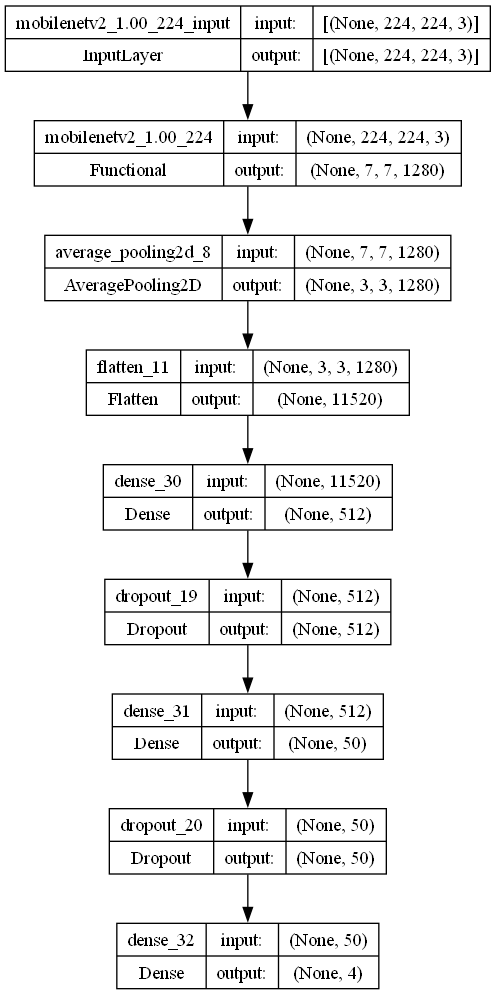

In [371]:
plot_model(model_third, to_file='images/model_third_architecture.png', show_shapes=True, show_layer_names=True)

### Set training and testing data in required dimension to use for training the model

In [373]:
print("trainX shape:", training_data.shape)
print("testX shape:", test_data.shape)
print("trainY shape:", y_train_one_hot.shape)
print("testY shape:", y_test_one_hot.shape)
trainX = training_data
testX = test_data
trainY = y_train_one_hot
testY = y_test_one_hot

trainX shape: (10799, 224, 224, 3)
testX shape: (596, 224, 224, 3)
trainY shape: (10799, 4)
testY shape: (596, 4)


## Training third model

In [375]:
print("[INFO] training ...")
third_model_result = model_third.fit(trainX, trainY, batch_size=32,steps_per_epoch=len(trainX) // 32,	validation_data=(testX, testY),	validation_steps=len(testX) // 32,	epochs=20)

[INFO] training ...
Epoch 1/20
337/337 [==============================] - 66s 184ms/step - loss: 0.6533 - accuracy: 0.7975 - val_loss: 17.2280 - val_accuracy: 0.1580
Epoch 2/20
337/337 [==============================] - 59s 175ms/step - loss: 0.1183 - accuracy: 0.9598 - val_loss: 24.1526 - val_accuracy: 0.1580
Epoch 4/20
337/337 [==============================] - 60s 177ms/step - loss: 0.1048 - accuracy: 0.9668 - val_loss: 33.0487 - val_accuracy: 0.1580
Epoch 5/20
337/337 [==============================] - 60s 177ms/step - loss: 0.0831 - accuracy: 0.9747 - val_loss: 35.1820 - val_accuracy: 0.1580
Epoch 6/20
337/337 [==============================] - 60s 178ms/step - loss: 0.0775 - accuracy: 0.9785 - val_loss: 32.3139 - val_accuracy: 0.1580
Epoch 7/20
337/337 [==============================] - 61s 180ms/step - loss: 0.0447 - accuracy: 0.9847 - val_loss: 52.6152 - val_accuracy: 0.1580
Epoch 8/20
337/337 [==============================] - 61s 180ms/step - loss: 0.0431 - accuracy: 0.9869 -

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



337/337 [==============================] - 62s 185ms/step - loss: 0.0341 - accuracy: 0.9915 - val_loss: 70.7407 - val_accuracy: 0.1580
Epoch 15/20
337/337 [==============================] - 61s 181ms/step - loss: 0.0313 - accuracy: 0.9929 - val_loss: 52.4753 - val_accuracy: 0.1580
Epoch 16/20
337/337 [==============================] - 61s 182ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 54.2157 - val_accuracy: 0.1580
Epoch 17/20
337/337 [==============================] - 61s 181ms/step - loss: 0.0321 - accuracy: 0.9913 - val_loss: 45.7543 - val_accuracy: 0.1580
Epoch 19/20
337/337 [==============================] - 61s 180ms/step - loss: 0.0186 - accuracy: 0.9953 - val_loss: 41.0417 - val_accuracy: 0.1580
Epoch 20/20
337/337 [==============================] - 61s 180ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 72.7068 - val_accuracy: 0.1580


## Evaluation and Accuracy of Third Model

### To achieve this we will make predictions on the testing set and creating the classification report

In [ ]:
model_third_test_loss, model_third_test_accuracy = model_third.evaluate(testX)
print(f"Test Accuracy: {model_third_test_accuracy:.2f}")

In [377]:
print("[INFO] evaluating network...")
predIdxs = model_third.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=label_encoder.classes_,zero_division=1))

[INFO] evaluating network...
19/19 [==============================] - 5s 143ms/step
              precision    recall  f1-score   support

    AIRPLANE       1.00      0.00      0.00       128
        BIRD       1.00      0.00      0.00       123
       DRONE       1.00      0.00      0.00       234
  HELICOPTER       0.19      1.00      0.31       111

    accuracy                           0.19       596
   macro avg       0.80      0.25      0.08       596
weighted avg       0.85      0.19      0.06       596



### Interpretation of the Results:
- Poor Recall for Most Classes: The model is failing to correctly identify the majority of classes, with a recall of 0% for "AIRPLANE", "BIRD", and "DRONE". This suggests that the model might be overfitting or biased towards the "HELICOPTER" class, which it recognizes much better (perfect recall for "HELICOPTER").

- High Precision but Low Recall: The high precision for "AIRPLANE", "BIRD", and "DRONE" suggests that when the model predicts these classes, it is likely correct. However, since recall is 0%, the model is not predicting these classes at all during evaluation, which is a significant problem.

- Imbalanced Performance: The performance on the "HELICOPTER" class is better, but overall, the model's performance is imbalanced and poor across other classes, which could be due to class imbalance, inadequate training, or incorrect labeling.

### Plotting Training Loss vs Accuracy for Third Model

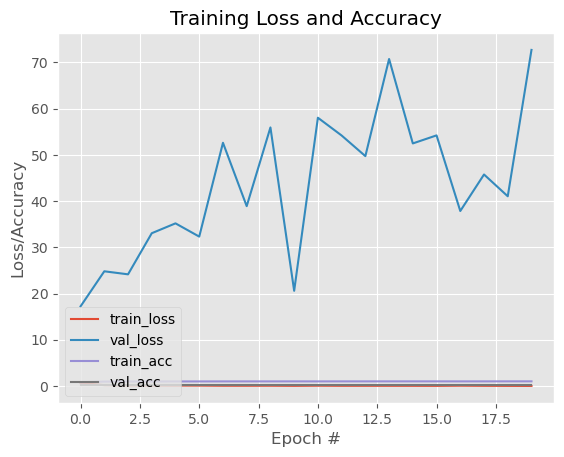

In [379]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), third_model_result.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), third_model_result.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), third_model_result.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), third_model_result.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

### Use of Confusion Matrix
A confusion matrix is an essential tool for understanding the performance of a classification model, especially in multiclass classification tasks. It provides a deeper understanding of the model's strengths and weaknesses, helps with identifying class imbalances or misclassifications, and guides further model improvement strategies

To better understand class weights and class imbalance, as observed in the case of the third model, a confusion matrix can be extremely helpful. It provides a detailed view of how the model performs across different classes, highlighting misclassifications and giving insight into which classes are underperforming. This can help identify areas where class imbalance may be affecting the model's accuracy and guide adjustments such as applying class weights.

19/19 [==============================] - 3s 139ms/step


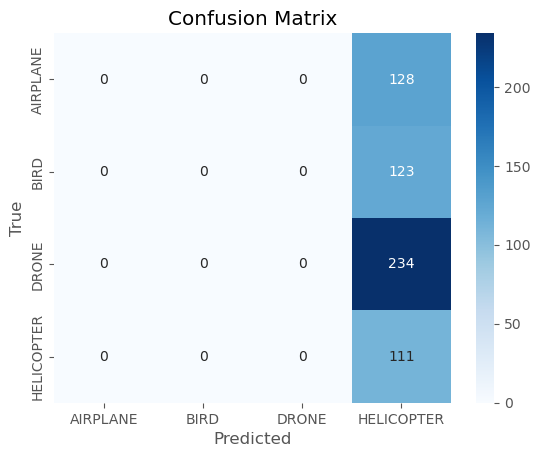

In [387]:
from sklearn.metrics import confusion_matrix
y_pred_classes = np.argmax(model_third.predict(testX), axis=-1)
y_true = np.argmax(testY, axis=-1)
cm = confusion_matrix(y_true, y_pred_classes)
class_labels = ['AIRPLANE', 'BIRD', 'DRONE', 'HELICOPTER']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Suggested Improvement is advice to improve the third model
-  Addressing Low Precision or Recall for Specific Classes using Class weights, resampling and data augementation.
-  Improve Model's Sensitivity to Minority Classes
-  Improving Model Architecture, in case of pre-trained model like MobileNetV2, we can use fine-tunning layers and freeze the earlier layers 
   and fine-tune the deep layers based on the classification performance for each class. 
-  Implement K-Fold Cross-Validation to ensure the model's performance is not biased.                                                                                                                                                                                                                

### Model Comparison 

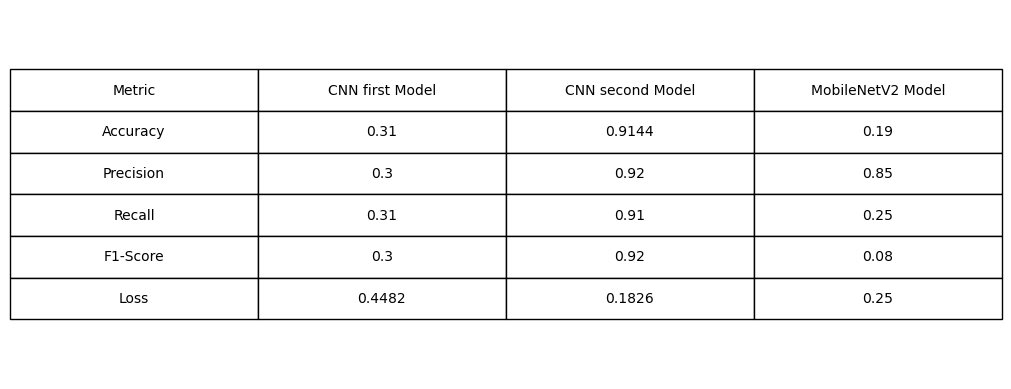

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
# Data for comparison based on Classification report of model prediction
model_comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Loss'],
    'CNN first Model': [0.31, 0.30, 0.31, 0.30, 0.4482],
    'CNN second Model': [0.9144, 0.92, 0.91, 0.92, 0.1826],
    'MobileNetV2 Model': [0.19, 0.85, 0.25, 0.08, 0.25]
}

# Creating the DataFrame
model_comparison_data_df = pd.DataFrame(model_comparison_data)

# Create a figure and an axes
fig, ax = plt.subplots()

# Hide axes
ax.axis('off')

# Create table
table = ax.table(
    cellText=model_comparison_data_df.values,
    colLabels=model_comparison_data_df.columns,
    cellLoc='center',
    loc='center'
)

# Adjust table properties (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 2.5)

# Display the table
plt.show()

## Project Summary:

From above comparison we can clearly find that CNN first model needs improvment. 
The accuracy is low, also the precision and recall for most classes are also low, indicating that the model is not effectively distinguishing between the different classes. We need to explore methods for improving performance, such as fine-tuning the model, balancing the dataset, 
so the second model was created using same CNN architecture but trained with hyper parameter to give better result compare to CNN first model. 
For ModelNetV2 Model has severe issues with class imbalance and generalization. Even though it performs well on some classes in terms of precision, the overall performance is low due to the inability to correctly identify instances across most classes. Addressing these issues will be key to improving the model's accuracy and overall performance